In [77]:
class Car:

    def __init__(self, raw): #конструктор
        self.name = raw[0]
        self.model = raw[1]
        self.year = raw[2]
        self.number = raw[3]
        self.color = raw[4]
        
    def __eq__(self, other): #x = y
        if self.number == other.number:
            if self.year == other.year:
                if self.model == other.model:
                    if self.color == other.color:
                        if self.name == other.name:
                            return True
        return False
    
    def __ne__(self, other): #x != y
        if self == other:
            return False
        else:
            return True
        
    def __lt__(self, other): #x < y
        if self.model < other.model:
            return True
        elif self.model == other.model:
            if self.year < other.year:
                return True
            elif self.year == other.year:
                if self.number < other.number:
                    return True
                elif self.number == other.number:
                    if self.color < other.color:
                        return True
                    elif self.color == other.color:
                        if self.name < other.name:
                            return True
        return False
    
    def __gt__(self, other): #x > y
        if self.model > other.model:
            return True
        elif self.model == other.model:
            if self.year > other.year:
                return True
            elif self.year == other.year:
                if self.number > other.number:
                    return True
                elif self.number == other.number:
                    if self.color > other.color:
                        return True
                    elif self.color == other.color:
                        if self.name > other.name:
                            return True
        return False
    
    def __le__(self, other): #x <= y
        if (self < other) or (self == other):
            return True
        else:
            return False
        
    def __ge__(self, other): #x >= y
        if (self > other) or (self == other):
            return True
        else:
            return False

In [62]:
def quick_sort(lst_f):
    lst = lst_f.copy()
    if len(lst) <= 1:
        return lst
    left = []
    center = []
    right = []
    for i in lst:
        if i < lst[0]:
            left.append(i)
        elif i > lst[0]:
            right.append(i)
        elif i == lst[0]:
            center.append(i)
    return (quick_sort(left) + center + quick_sort(right))

In [63]:
def line_search(lst_f, size, key):
    for i in lst_f:
        if i.model == key:
            return

In [64]:
def bin_search(lst_f, start, end, key):
    mid = 0
    while (1):
        mid = (start + end) // 2
        if key < lst_f[mid].model:
            end = mid - 1
        elif key > lst_f[mid].model:
            start = mid + 1
        else:
            return

In [65]:
import pandas as pd

In [66]:
def read_table(n):
    table = pd.read_csv('car' + str(n) + '.csv')
    mas = []
    for i in range(0, n):
        elem = Car(table.iloc[i])
        mas.append(elem)
    return mas

In [67]:
from collections import defaultdict

In [68]:
def make_dict(lst_f):
    mas_dict = defaultdict(list)
    for i in lst_f:
        mas_dict[i.model].append(i)
    return mas_dict

In [69]:
from time import time

In [70]:
def work_for_one(n):
    mas = read_table(n)
    mas_dict = make_dict(mas)
    start1 = time()
    line_search(mas, n, 'Jeep')
    time1 = time() - start1
    start2 = time()
    sort_mas = quick_sort(mas);
    bin_search(sort_mas, 0, n - 1, 'Jeep')
    time2 = time() - start2
    start3 = time()
    bin_search(sort_mas, 0, n - 1, 'Jeep')
    time3 = time() - start3
    start4 = time()
    mas_dict['Jeep']
    time4 = time() - start4
    return "{:.7f}".format(time1), '{:.7f}'.format(time2), '{:.7f}'.format(time3), '{:.7f}'.format(time4)

In [71]:
import matplotlib.pyplot as plt

In [75]:
def work2(lst_f):
    x = lst_f.copy()
    y1 = []
    y2 = []
    y3 = []
    y4 = []
    for i in lst_f:
        time1, time2, time3, time4 = work_for_one(i)
        y1.append(time1)
        y2.append(time2)
        y3.append(time3)
        y4.append(time4)
    print(y1)
    print(y2)
    print(y3)
    print(y4)
    time_table = pd.DataFrame({'Количество элементов' : x, 'Линейный поиск' : y1, 'Бинарный поиск с сортировкой' : y2, 'Бинарный поиск' : y3, 'Словарь' : y4})
    time_table.to_csv('laba2time.csv', index = False)
    plt.plot(x, sorted(y4), label = 'cловарь')
    plt.plot(x, sorted(y3), label = 'бинарный поиск')
    plt.plot(x, sorted(y1), label = 'линейный поиск')
    plt.plot(x, sorted(y2), label = 'бинарный поиск с сортировкой')
    plt.legend()
     
    plt.show()

['0.0000031', '0.0000021', '0.0000031', '0.0000069', '0.0000041', '0.0000191', '0.0000069']
['0.0004921', '0.0025792', '0.0047240', '0.0326829', '0.0713582', '0.5556381', '1.2414892']
['0.0000019', '0.0000019', '0.0000019', '0.0000021', '0.0000017', '0.0000021', '0.0000017']
['0.0000007', '0.0000010', '0.0000010', '0.0000010', '0.0000021', '0.0000010', '0.0000010']


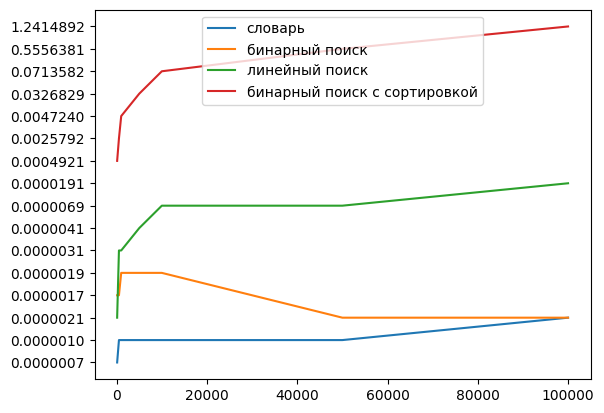

In [76]:
n = [100, 500, 1000, 5000, 10000, 50000, 100000]
work2(n)